# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the MD/MC code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the MD/MC code to print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. Make pictures of these statistical uncertainties as a function of $L$. What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

### Exercise 07.3

Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the MD/MC code: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### Exercise 07.4

By means of your upgraded MD/MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.optimize import curve_fit

## <span style="color:blue"> Equilibrazione </span>

In [113]:
#Carico dati da file
gassoso = np.loadtxt("Equilibrazioni/Gassoso.dat", unpack=True)
liquido = np.loadtxt("Equilibrazioni/Liquido.dat", unpack=True)
solido = np.loadtxt("Equilibrazioni/Solido.dat", unpack=True)

T = np.array([1.2, 1.1, 0.8])

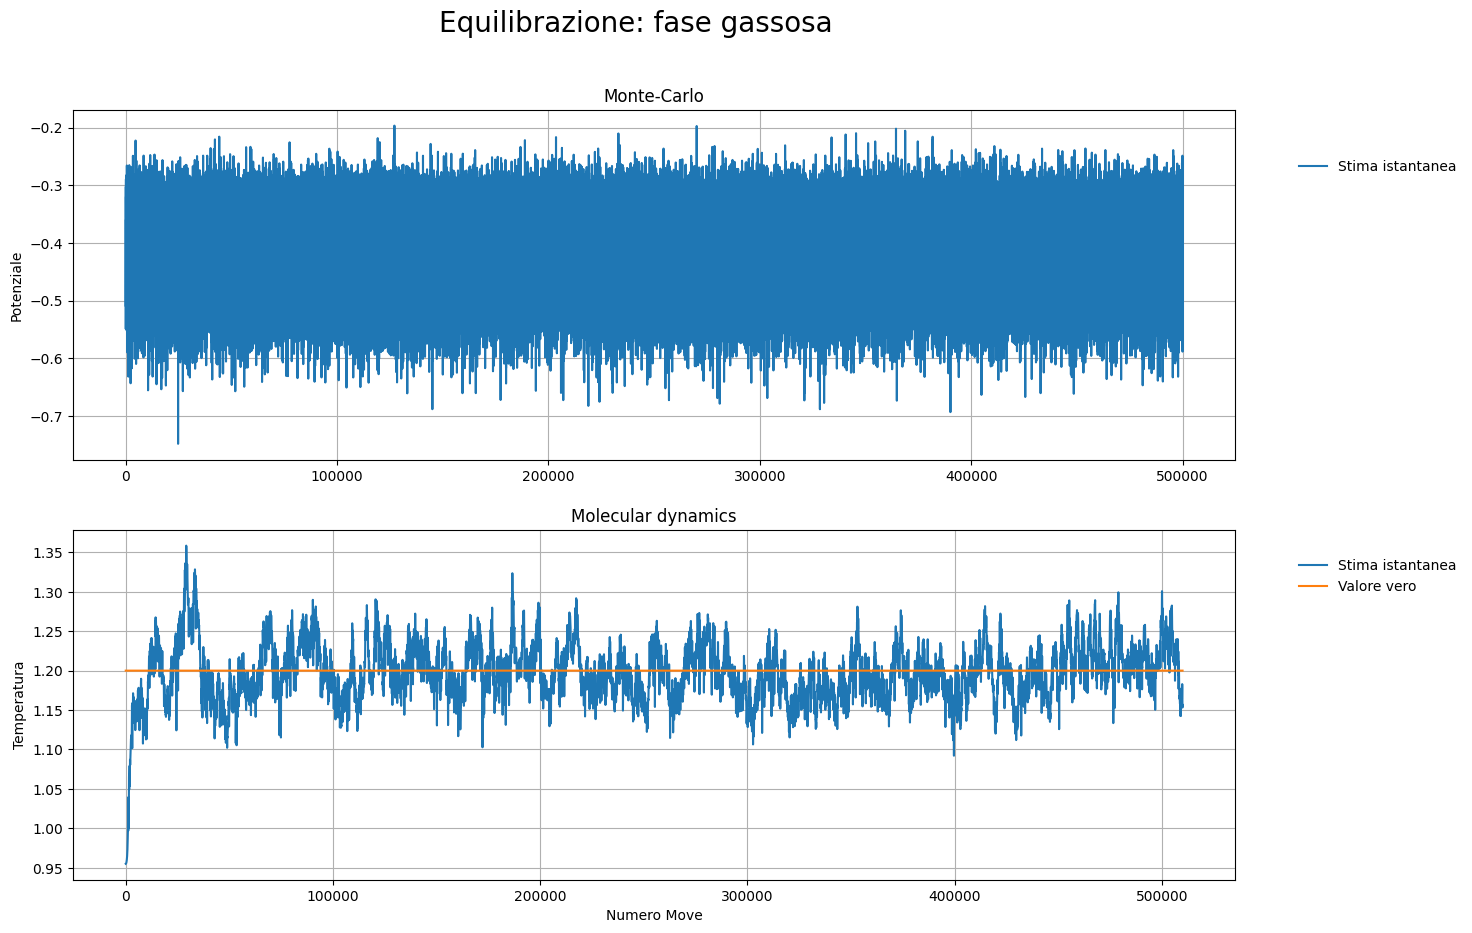

In [114]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
titoli = ['Monte-Carlo', 'Molecular dynamics']


for i in range(0, 2):

    if i == 0:
        axes[i].plot(gassoso[0, 0 : 500000], gassoso[1 , 0 : 500000], label = 'Stima istantanea')
        axes[i].set_ylabel('Potenziale')

    else:
        axes[i].plot(gassoso[0, 500000 : 1010000], gassoso[1 , 500000 : 1010000], label = 'Stima istantanea')
        axes[i].plot(gassoso[0, 500000 : 1010000], np.array([T[0] for i in range(0, 510000)]), label = 'Valore vero')
        axes[i].set_ylabel('Temperatura')

    axes[i].legend(loc=(1.05, 0.8), frameon=False)    
    axes[i].set_title(titoli[i])
    axes[i].grid(True)

axes[1].set_xlabel('Numero Move')    
fig.suptitle(f'Equilibrazione: fase gassosa', fontsize = '20')

plt.show()

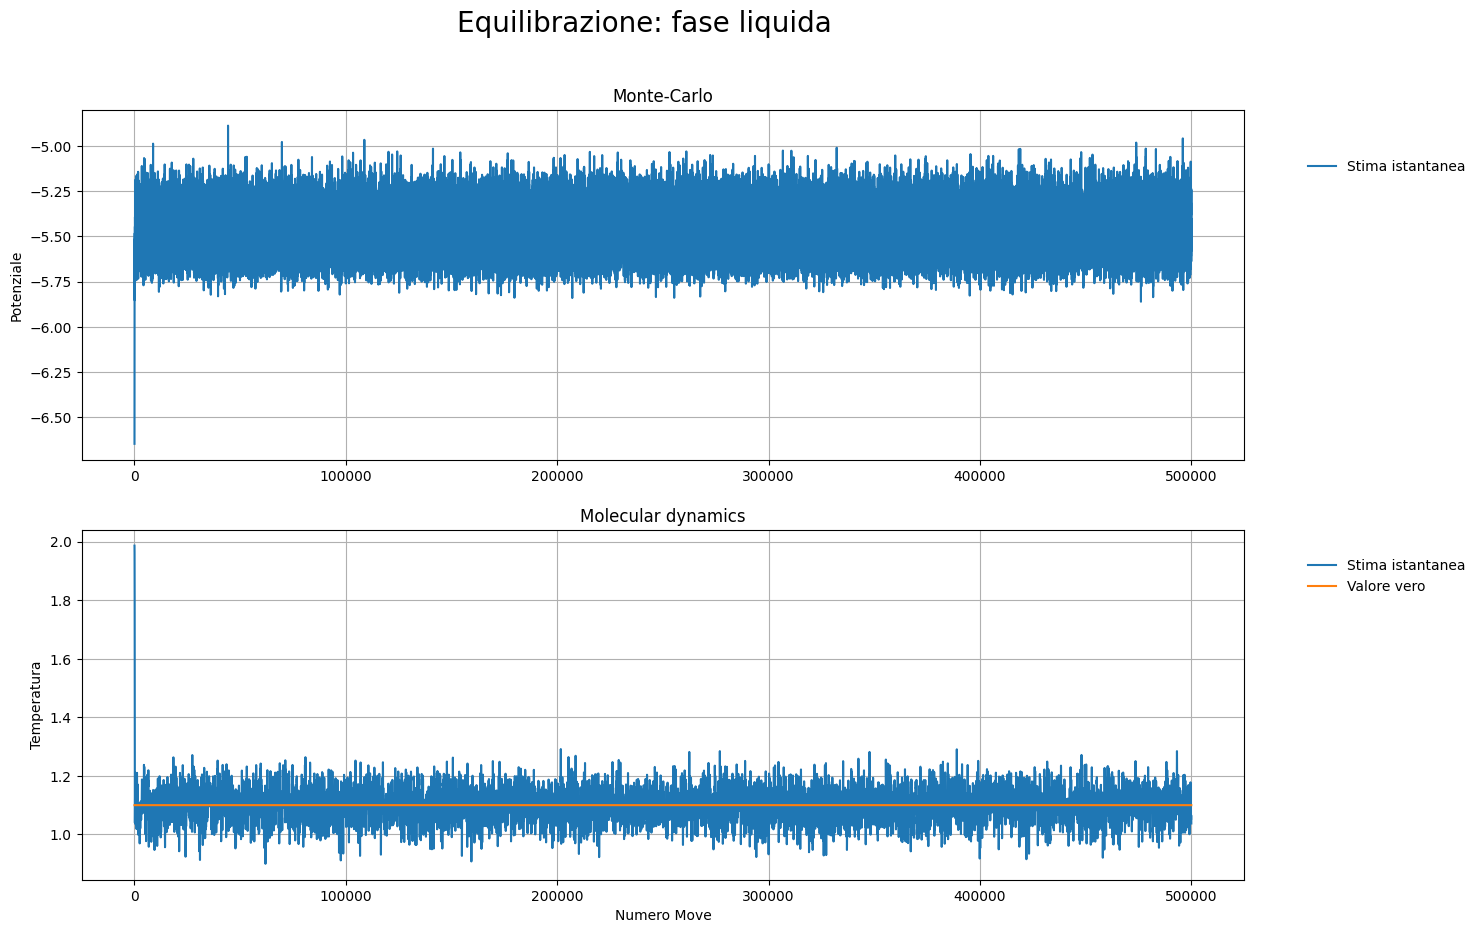

In [115]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
titoli = ['Monte-Carlo', 'Molecular dynamics']


for i in range(0, 2):

    if i == 0:
        axes[i].plot(liquido[0, 0 : 500000], liquido[1 , 0 : 500000], label = 'Stima istantanea')
        axes[i].set_ylabel('Potenziale')

    else:
        axes[i].plot(liquido[0, 500000 : 1000000], liquido[1 , 500000 : 1000000], label = 'Stima istantanea')
        axes[i].plot(liquido[0, 500000 : 1000000], np.array([T[1] for i in range(0, 500000)]), label = 'Valore vero')
        axes[i].set_ylabel('Temperatura')

    axes[i].legend(loc=(1.05, 0.8), frameon=False)    
    axes[i].set_title(titoli[i])
    axes[i].grid(True)

axes[1].set_xlabel('Numero Move')    
fig.suptitle(f'Equilibrazione: fase liquida', fontsize = '20')

plt.show()

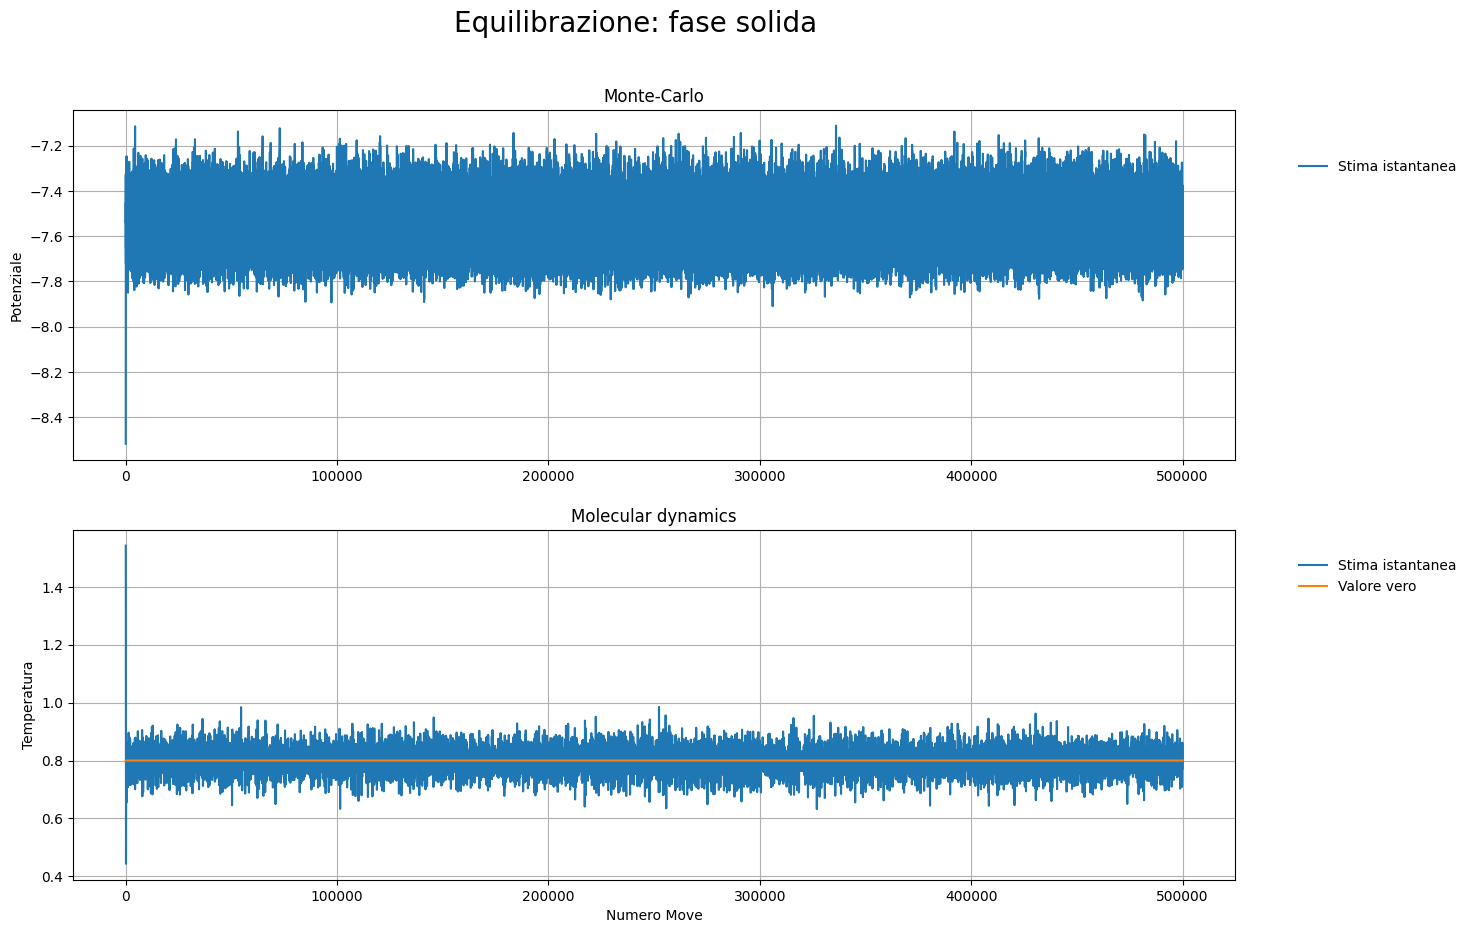

In [116]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
titoli = ['Monte-Carlo', 'Molecular dynamics']

for i in range(0, 2):

    if i == 0:
        axes[i].plot(solido[0, 0 : 500000], solido[1 , 0 : 500000], label = 'Stima istantanea')
        axes[i].set_ylabel('Potenziale')

    else:
        axes[i].plot(solido[0, 500000 : 1000000], solido[1 , 500000 : 1000000], label = 'Stima istantanea')
        axes[i].plot(solido[0, 500000 : 1000000], np.array([T[2] for i in range(0, 500000)]), label = 'Valore vero')
        axes[i].set_ylabel('Temperatura')

    axes[i].legend(loc=(1.05, 0.8), frameon=False)    
    axes[i].set_title(titoli[i])
    axes[i].grid(True)

axes[1].set_xlabel('Numero Move')    
fig.suptitle(f'Equilibrazione: fase solida', fontsize = '20')

plt.show()

In [117]:
titolo = np.array(['fase gassosa ', 'fase liquida ', 'fase solida '])

for j in range(0, 3):

    if j==0:
        val = gassoso[1, 510000 : 1010000]
    
    elif j==1:
        val = liquido[1, 500200 : 1000000]
    
    elif j==2:
        val = solido[1, 500300 : 1000000]

    #Contenitori per media e media2
    media = 0
    media2 = 0

    for i in range(0, len(val)):
        media = media * i/(i+1) + val[i]/(i+1)
        media2 = media2 * i/(i+1) + val[i] * val[i]/(i+1)

    print("La temperatura media calcolata con il sistema in equilibrio in " + titolo[j] + str(round(media, 3)))
    print("L'errore associato a questa stima è: " + str(round(math.sqrt((media2 - media*media)/(len(val)-1)), 4)) + '\n')

La temperatura media calcolata con il sistema in equilibrio in fase gassosa 1.201
L'errore associato a questa stima è: 0.0

La temperatura media calcolata con il sistema in equilibrio in fase liquida 1.101
L'errore associato a questa stima è: 0.0001

La temperatura media calcolata con il sistema in equilibrio in fase solida 0.8
L'errore associato a questa stima è: 0.0001



## <span style="color:blue"> Funzioni di auto-correlazione </span>

In [3]:
def ACF(x, tn):
    ac = np.zeros(tn)
    tmax = x.size
    for t in range(0, tn):
        ac[t] = (np.sum(x[0:tmax-t]*x[t:])/(tmax-t) - (np.sum(x[0:tmax - t])*np.sum(x[t:]))/(tmax-t)**2)/(np.sum(x*x)/tmax - (np.sum(x)/tmax)**2)
    return ac


def exponential_func(x, b):
    return np.exp(-b * x)

#### Stima blocchi - gassoso

In [4]:
##Carico dati da file
gassoso = np.loadtxt("Auto_correlazioni/Gassoso.dat", unpack=True)
maxstep = 5000


pot_g = gassoso[1, 0:500000]
press_g = gassoso[1, 500000:1000000]

gas_autopot = ACF(pot_g,maxstep)
gas_autopress = ACF(press_g,maxstep)

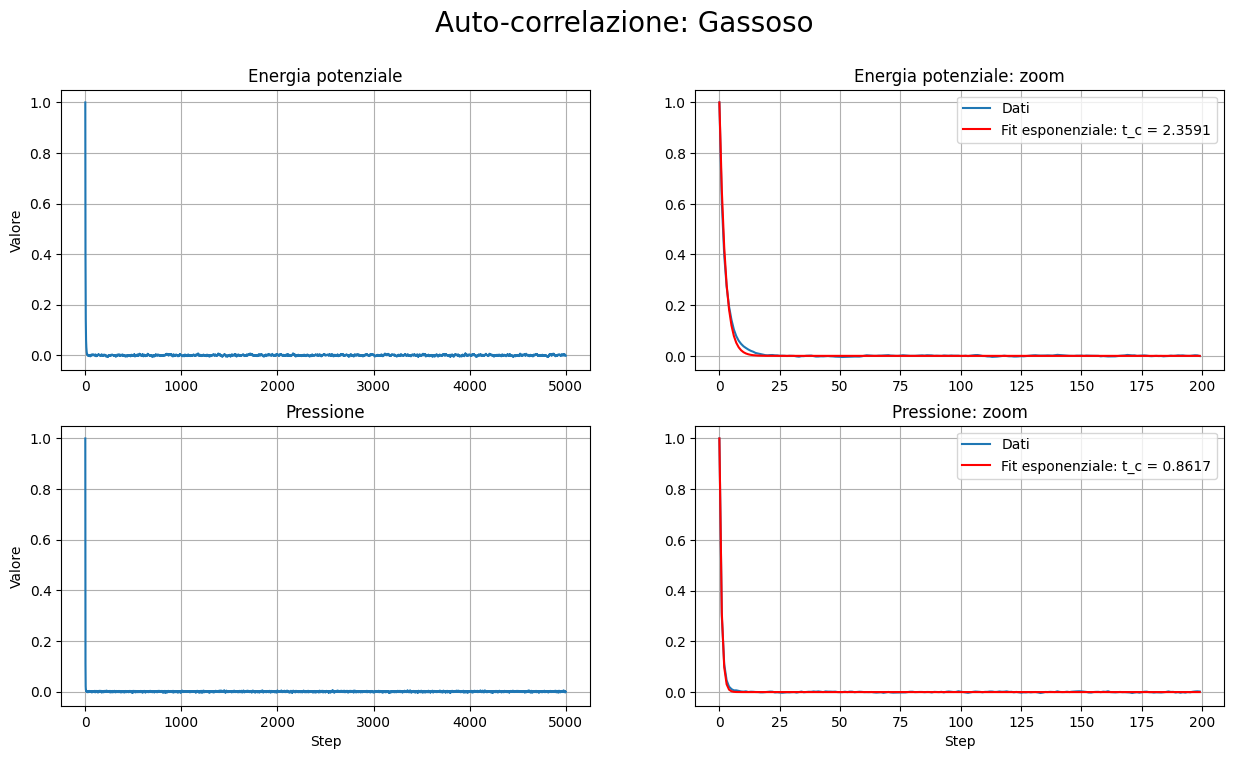

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
titolo = np.array(['Energia potenziale', 'Pressione'])

for i in range (0, 2):
    for j in range(0, 2):

        if i==0:

            if j==0:
                ax[i][j].plot(np.array([k for k in range(0, 5000)]), gas_autopot[0 : 5000])
                ax[i][j].set_title(titolo[i])
                ax[i][j].set_ylabel(r'Valore')
                
            else:
                # Fit dei dati con la funzione esponenziale
                params, cov = curve_fit(exponential_func, np.array([i for i in range(0, 5000)]),gas_autopot)# Fit dei dati con la funzione esponenziale
                b_fit = params
                x_fit = np.array([i for i in range(0, 200)])
                y_fit = exponential_func(x_fit, b_fit)

                ax[i][j].plot(np.array([k for k in range(0, 200)]), gas_autopot[0 : 200], label = 'Dati')
                ax[i][j].plot(x_fit, y_fit, label='Fit esponenziale: t_c = ' + str(round(1/float(b_fit), 4)), color = 'red')
                ax[i][j].set_title(titolo[i] + ': zoom')
                ax[i][j].legend()


        else:

            if j==0:
                ax[i][j].plot(np.array([k for k in range(0, 5000)]), gas_autopress[0 : 5000])
                ax[i][j].set_title(titolo[i])
                ax[i][j].set_ylabel(r'Valore')

            else:
                # Fit dei dati con la funzione esponenziale
                params, cov = curve_fit(exponential_func, np.array([i for i in range(0, 5000)]),gas_autopress)# Fit dei dati con la funzione esponenziale
                b_fit = params
                x_fit = np.array([i for i in range(0, 200)])
                y_fit = exponential_func(x_fit, b_fit)

                ax[i][j].plot(np.array([k for k in range(0, 200)]), gas_autopress[0 : 200], label = 'Dati')
                ax[i][j].plot(x_fit, y_fit, label='Fit esponenziale: t_c = ' + str(round(1/float(b_fit), 4)), color = 'red')
                ax[i][j].set_title(titolo[i] + ': zoom')
                ax[i][j].legend()

            ax[i][j].set_xlabel('Step')

        
        ax[i][j].grid(True)

fig.suptitle(f"Auto-correlazione: Gassoso", fontsize = 20)
plt.show()

In [121]:
tot = 500000


for h in range(0, 2):

    err = np.zeros(200)

    if h==0:
        val = gassoso[1, 0 : 500000]
    
    else:
        val = gassoso[1, 500000 : 1000000]

    #Ciclo per le varie lunghezze dei blocchi
    for i in range(1, 201):
        glob_ave = 0
        glob_ave2 = 0

        #Ciclo per le stime con una lunghezza dei blocchi fissata
        for j in range(0, math.floor(tot/(10 * i))):
            loc_ave = 0

            #Lavoro all'interno del singolo blocco
            for k in range(0, 10 * i):
                loc_ave = loc_ave * k/(k+1) + val[10 * i * j + k]/(k+1)
        
            glob_ave = glob_ave * j/(j+1) + loc_ave/(j+1)
            glob_ave2 = glob_ave2 * j/(j+1) + loc_ave * loc_ave/(j+1)
    
        err[i-1] = math.sqrt((glob_ave2 - pow(glob_ave, 2))/(math.floor(tot/(10 * i)) - 1))

    if h==0:
        gas_errpot = err
        print('\n'+'Effettuata stima errori: energia potenziale' + '\n')
    
    else:
        gas_errpress = err  
        print('\n'+'Effettuata stima errori: pressione' + '\n')


Effettuata stima errori: energia potenziale


Effettuata stima errori: pressione



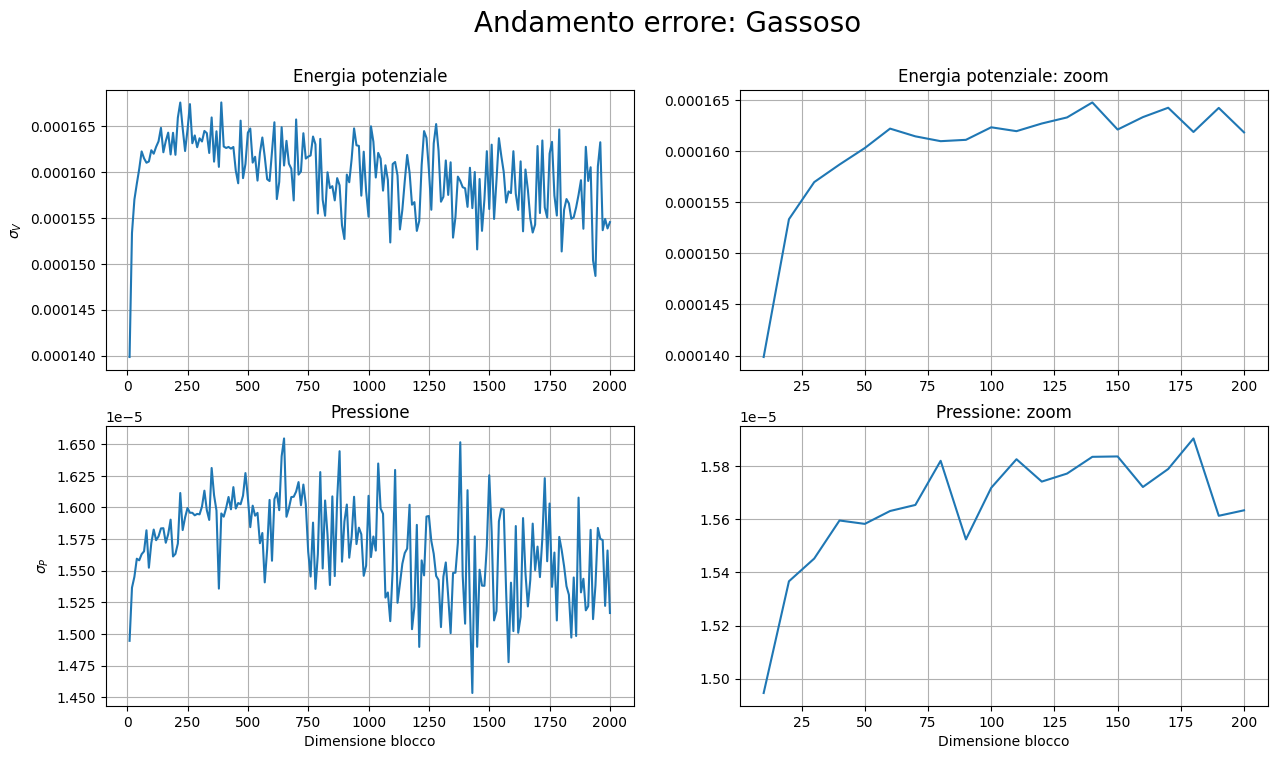

In [122]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
titolo = np.array(['Energia potenziale', 'Pressione'])

for i in range (0, 2):
    for j in range(0, 2):

        if i==0:

            if j==0:
                ax[i][j].plot(np.array([10 * i for i in range(1, 201)]), gas_errpot)
                ax[i][j].set_title(titolo[i])
                ax[i][j].set_ylabel(r'$\sigma_V$')
                
            else:
                ax[i][j].plot(np.array([10 * i for i in range(1, 21)]), gas_errpot[0 : 20])
                ax[i][j].set_title(titolo[i] + ': zoom')


        else:

            if j==0:
                ax[i][j].plot(np.array([10 * i for i in range(1, 201)]), gas_errpress)
                ax[i][j].set_title(titolo[i])
                ax[i][j].set_ylabel(r'$\sigma_P$')

            else:
                ax[i][j].plot(np.array([10 * i for i in range(1, 21)]), gas_errpress[0 : 20])
                ax[i][j].set_title(titolo[i] + ': zoom')

            ax[i][j].set_xlabel('Dimensione blocco')

        
        ax[i][j].grid(True)

fig.suptitle(f"Andamento errore: Gassoso", fontsize = 20)
plt.show()

##### Stima blocchi - liquido

In [11]:
##Carico dati da file
liquido = np.loadtxt("Auto_correlazioni/Liquido.dat", unpack=True)
maxstep = 5000


pot_l = liquido[1, 0 : 500000]
press_l = liquido[1, 500000 : 1000000]

liq_autopot = ACF(pot_l,maxstep)
liq_autopress = ACF(press_l,maxstep)

/tmp/ipykernel_5492/2483845320.py:10: RuntimeWarning: overflow encountered in exp
  return np.exp(-b * x)


[0.10594968]


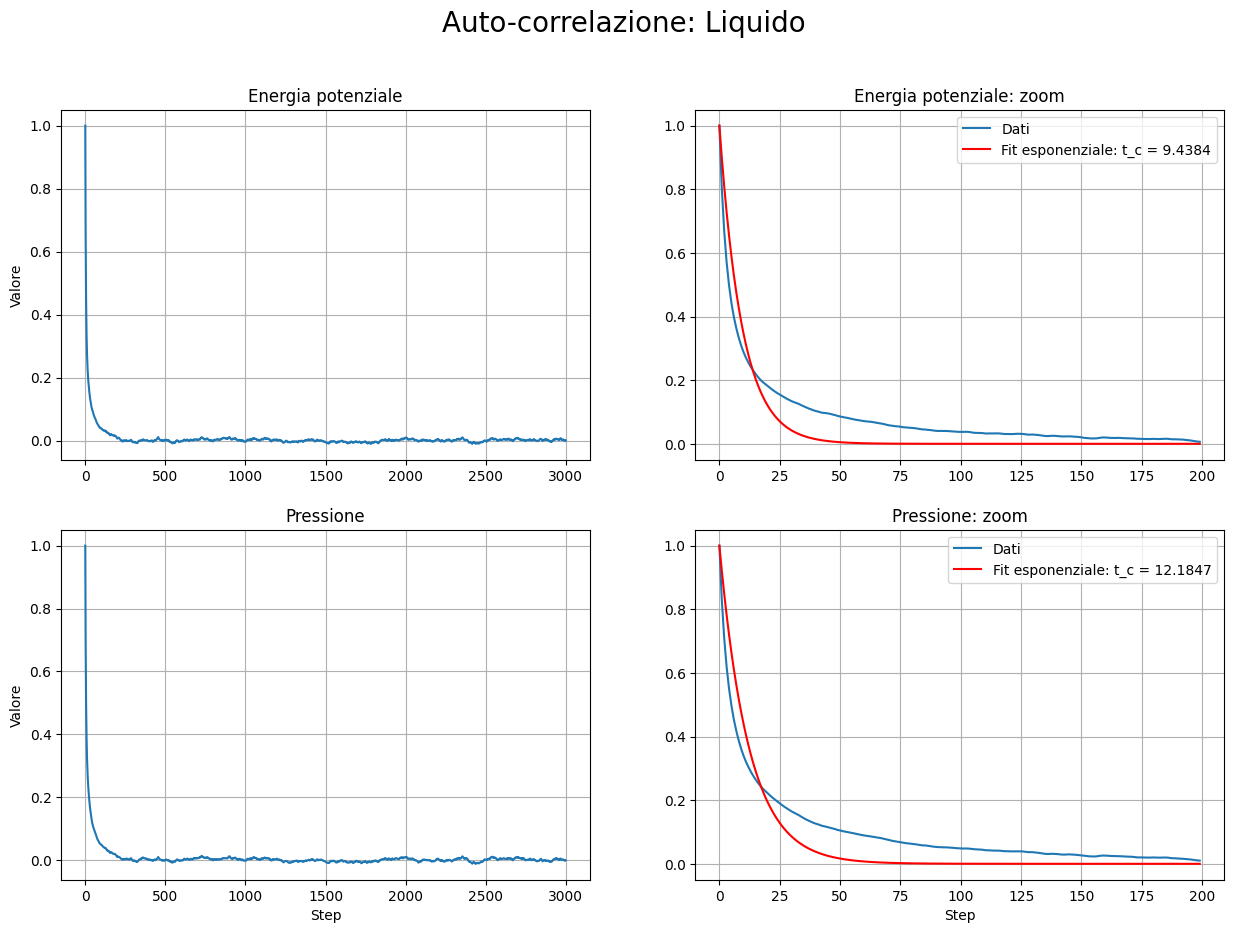

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
titolo = np.array(['Energia potenziale', 'Pressione'])

for i in range (0, 2):
    for j in range(0, 2):

        if i==0:

            if j==0:
                ax[i][j].plot(np.array([k for k in range(0, 3000)]), liq_autopot[0: 3000])
                ax[i][j].set_title(titolo[i])
                ax[i][j].set_ylabel(r'Valore')
                
            else:
                # Fit dei dati con la funzione esponenziale
                params, cov = curve_fit(exponential_func, np.array([k for k in range(0, 5000)]),liq_autopot)# Fit dei dati con la funzione esponenziale
                b_fit = params
                x_fit = np.array([k for k in range(0, 200)])
                y_fit = exponential_func(x_fit, b_fit)

                ax[i][j].plot(np.array([k for k in range(0, 200)]), liq_autopot[0 : 200], label = 'Dati')
                ax[i][j].plot(x_fit, y_fit, label='Fit esponenziale: t_c = ' + str(round(1/float(b_fit), 4)), color = 'red')
                ax[i][j].set_title(titolo[i] + ': zoom')
                ax[i][j].legend()

        else:

            if j==0:
                ax[i][j].plot(np.array([k for k in range(0, 3000)]), liq_autopress[0 : 3000])
                ax[i][j].set_title(titolo[i])
                ax[i][j].set_ylabel(r'Valore')

            else:
                # Fit dei dati con la funzione esponenziale
                params, cov = curve_fit(exponential_func, np.array([k for k in range(0, 5000)]),liq_autopress)# Fit dei dati con la funzione esponenziale
                b_fit = params
                x_fit = np.array([k for k in range(0, 200)])
                y_fit = exponential_func(x_fit, b_fit)

                ax[i][j].plot(np.array([k for k in range(0, 200)]), liq_autopress[0 : 200], label = 'Dati')
                ax[i][j].plot(x_fit, y_fit, label='Fit esponenziale: t_c = ' + str(round(1/float(b_fit), 4)), color = 'red')
                ax[i][j].set_title(titolo[i] + ': zoom')
                ax[i][j].legend()

            ax[i][j].set_xlabel('Step')

        
        ax[i][j].grid(True)

fig.suptitle(f"Auto-correlazione: Liquido", fontsize = 20)
plt.show()

In [125]:
tot = 500000


for h in range(0, 2):

    err = np.zeros(200)

    if h==0:
        val = liquido[1, 0 : 500000]
    
    else:
        val = liquido[1, 500000 : 1000000]

    #Ciclo per le varie lunghezze dei blocchi
    for i in range(1, 201):
        glob_ave = 0
        glob_ave2 = 0

        #Ciclo per le stime con una lunghezza dei blocchi fissata
        for j in range(0, math.floor(tot/(10 * i))):
            loc_ave = 0

            #Lavoro all'interno del singolo blocco
            for k in range(0, 10 * i):
                loc_ave = loc_ave * k/(k+1) + val[10 * i * j + k]/(k+1)
        
            glob_ave = glob_ave * j/(j+1) + loc_ave/(j+1)
            glob_ave2 = glob_ave2 * j/(j+1) + loc_ave * loc_ave/(j+1)
    
        err[i-1] = math.sqrt((glob_ave2 - pow(glob_ave, 2))/(math.floor(tot/(10 * i)) - 1))

    if h==0:
        liq_errpot = err
        print('\n'+'Effettuata stima errori: energia potenziale' + '\n')
    
    else:
        liq_errpress = err  
        print('\n'+'Effettuata stima errori: pressione' + '\n')


Effettuata stima errori: energia potenziale


Effettuata stima errori: pressione



Text(0.5, 0.98, 'Andamento errore: Liquido')

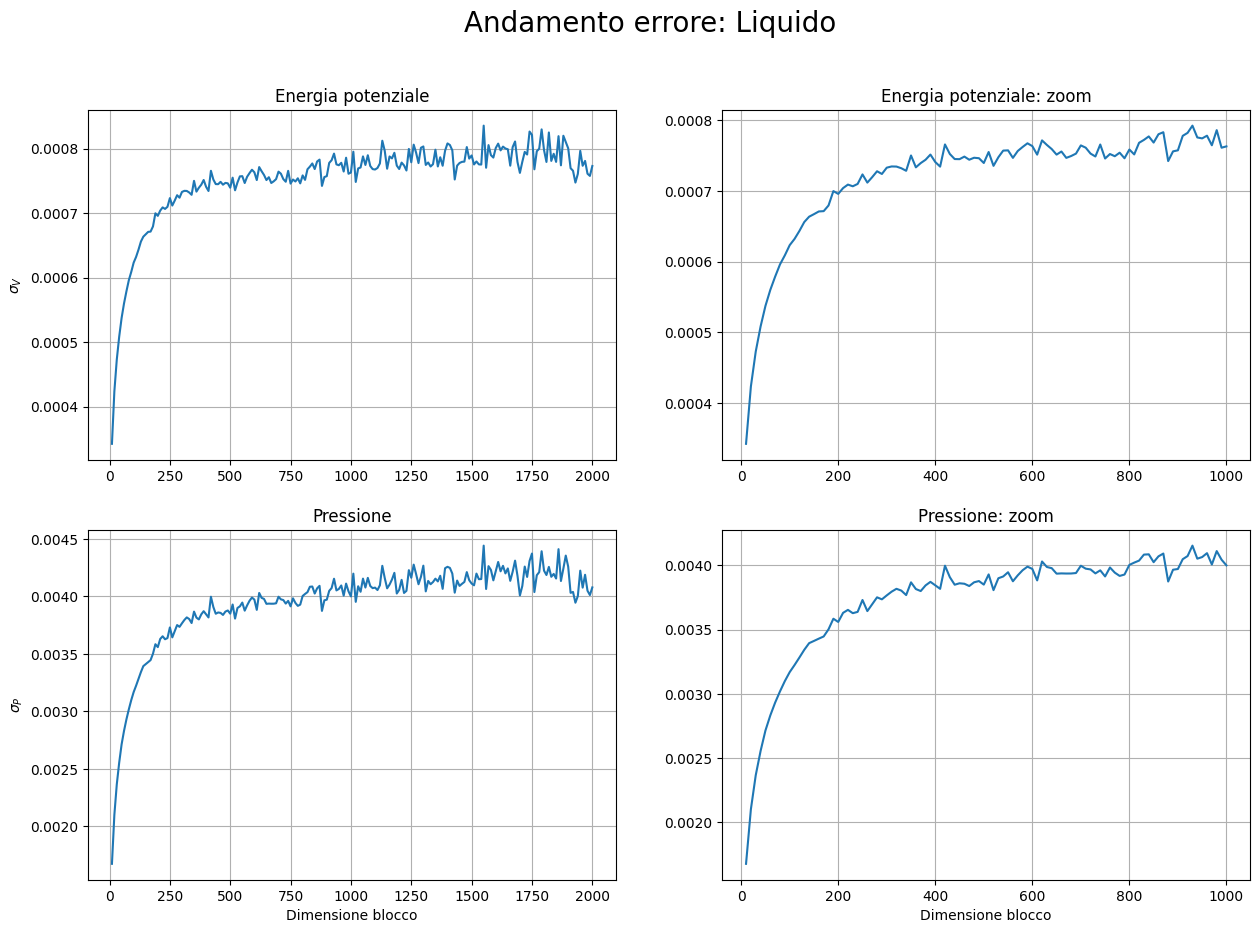

In [126]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
titolo = np.array(['Energia potenziale', 'Pressione'])

for i in range (0, 2):
    for j in range(0, 2):

        if i==0:

            if j==0:
                ax[i][j].plot(np.array([10 * i for i in range(1, 201)]), liq_errpot)
                ax[i][j].set_title(titolo[i])
                ax[i][j].set_ylabel(r'$\sigma_V$')
                
            else:
                ax[i][j].plot(np.array([10 * i for i in range(1, 101)]), liq_errpot[0 : 100])
                ax[i][j].set_title(titolo[i] + ': zoom')


        else:

            if j==0:
                ax[i][j].plot(np.array([10 * i for i in range(1, 201)]), liq_errpress)
                ax[i][j].set_title(titolo[i])
                ax[i][j].set_ylabel(r'$\sigma_P$')

            else:
                ax[i][j].plot(np.array([10 * i for i in range(1, 101)]), liq_errpress[0 : 100])
                ax[i][j].set_title(titolo[i] + ': zoom')

            ax[i][j].set_xlabel('Dimensione blocco')

        
        ax[i][j].grid(True)

fig.suptitle(f"Andamento errore: Liquido", fontsize = 20)

##### Stima blocchi - solido

In [14]:
##Carico dati da file
solido = np.loadtxt("Auto_correlazioni/Solido.dat", unpack=True)
maxstep = 5000


pot_s = solido[1, 0:500000]
press_s = solido[1, 500000:1000000]

sol_autopot = ACF(pot_s,maxstep)
sol_autopress = ACF(press_s,maxstep)

/tmp/ipykernel_5492/2483845320.py:10: RuntimeWarning: overflow encountered in exp
  return np.exp(-b * x)


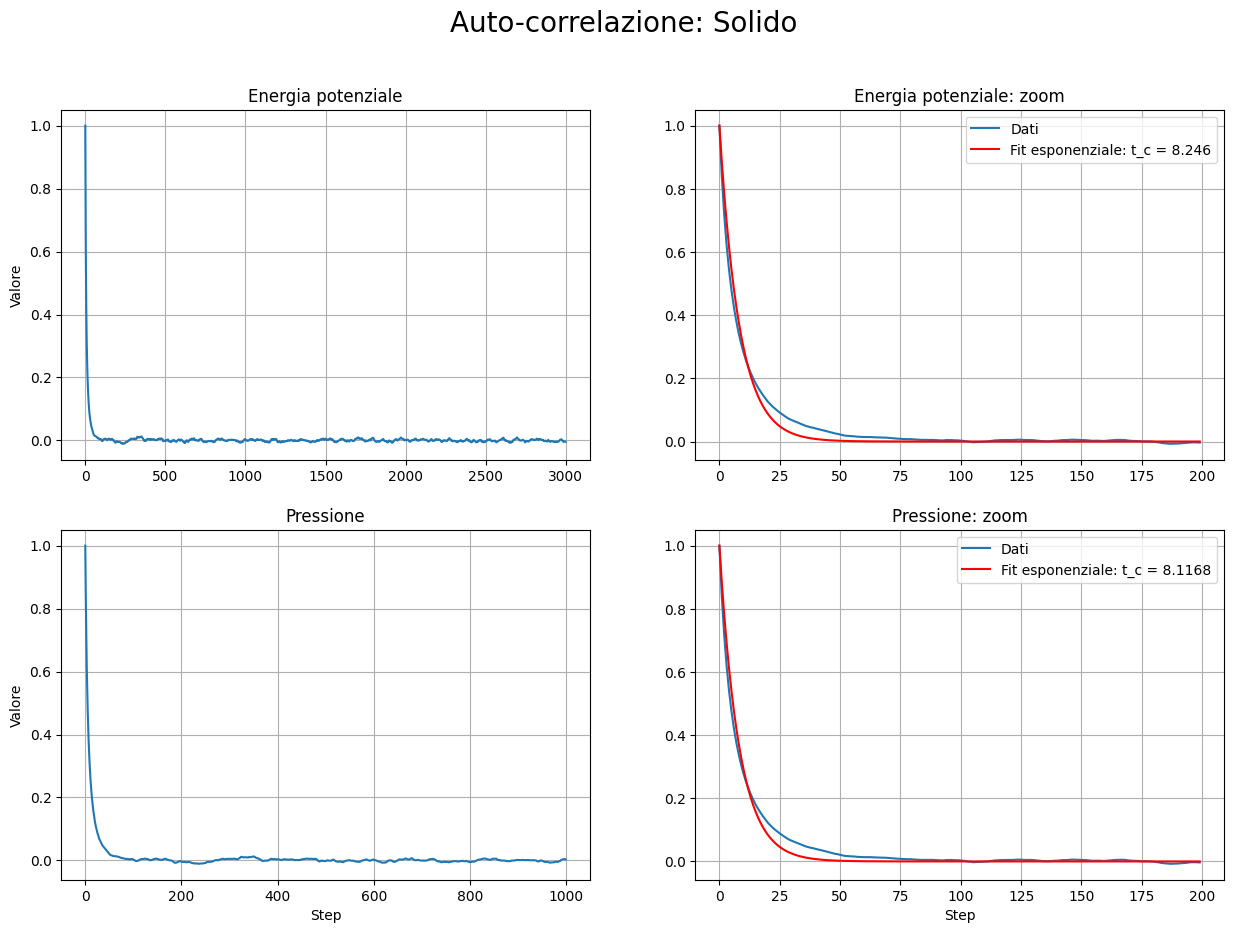

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
titolo = np.array(['Energia potenziale', 'Pressione'])

for i in range (0, 2):
    for j in range(0, 2):

        if i==0:

            if j==0:
                ax[i][j].plot(np.array([k for k in range(0, 3000)]), sol_autopot[0 : 3000])
                ax[i][j].set_title(titolo[i])
                ax[i][j].set_ylabel(r'Valore')
                
            else:
                # Fit dei dati con la funzione esponenziale
                params, cov = curve_fit(exponential_func, np.array([k for k in range(0, 5000)]),sol_autopot)# Fit dei dati con la funzione esponenziale
                b_fit = params
                x_fit = np.array([k for k in range(0, 200)])
                y_fit = exponential_func(x_fit, b_fit)

                ax[i][j].plot(np.array([k for k in range(0, 200)]), sol_autopot[0 : 200], label = 'Dati')
                ax[i][j].plot(x_fit, y_fit, label='Fit esponenziale: t_c = ' + str(round(1/float(b_fit), 4)), color = 'red')
                ax[i][j].set_title(titolo[i] + ': zoom')
                ax[i][j].legend()
                


        else:

            if j==0:
                ax[i][j].plot(np.array([k for k in range(0, 1000)]), sol_autopress[0 : 1000])
                ax[i][j].set_title(titolo[i])
                ax[i][j].set_ylabel(r'Valore')

            else:
                # Fit dei dati con la funzione esponenziale
                params, cov = curve_fit(exponential_func, np.array([k for k in range(0, 5000)]),sol_autopress)# Fit dei dati con la funzione esponenziale
                b_fit = params
                x_fit = np.array([k for k in range(0, 200)])
                y_fit = exponential_func(x_fit, b_fit)

                ax[i][j].plot(np.array([k for k in range(0, 200)]), sol_autopress[0 : 200], label = 'Dati')
                ax[i][j].plot(x_fit, y_fit, label='Fit esponenziale: t_c = ' + str(round(1/float(b_fit), 4)), color = 'red')
                ax[i][j].set_title(titolo[i] + ': zoom')
                ax[i][j].legend()

            ax[i][j].set_xlabel('Step')

        
        ax[i][j].grid(True)

fig.suptitle(f"Auto-correlazione: Solido", fontsize = 20)
plt.show()

In [129]:
tot = 500000


for h in range(0, 2):

    err = np.zeros(200)

    if h==0:
        val = solido[1, 0 : 500000]
    
    else:
        val = solido[1, 500000 : 1000000]

    #Ciclo per le varie lunghezze dei blocchi
    for i in range(1, 201):
        glob_ave = 0
        glob_ave2 = 0

        #Ciclo per le stime con una lunghezza dei blocchi fissata
        for j in range(0, math.floor(tot/(10 * i))):
            loc_ave = 0

            #Lavoro all'interno del singolo blocco
            for k in range(0, 10 * i):
                loc_ave = loc_ave * k/(k+1) + val[10 * i * j + k]/(k+1)
        
            glob_ave = glob_ave * j/(j+1) + loc_ave/(j+1)
            glob_ave2 = glob_ave2 * j/(j+1) + loc_ave * loc_ave/(j+1)
    
        err[i-1] = math.sqrt((glob_ave2 - pow(glob_ave, 2))/(math.floor(tot/(10 * i)) - 1))

    if h==0:
        sol_errpot = err
        print('\n'+'Effettuata stima errori: energia potenziale' + '\n')
    
    else:
        sol_errpress = err  
        print('\n'+'Effettuata stima errori: pressione' + '\n')


Effettuata stima errori: energia potenziale


Effettuata stima errori: pressione



Text(0.5, 0.98, 'Andamento errore: Solido')

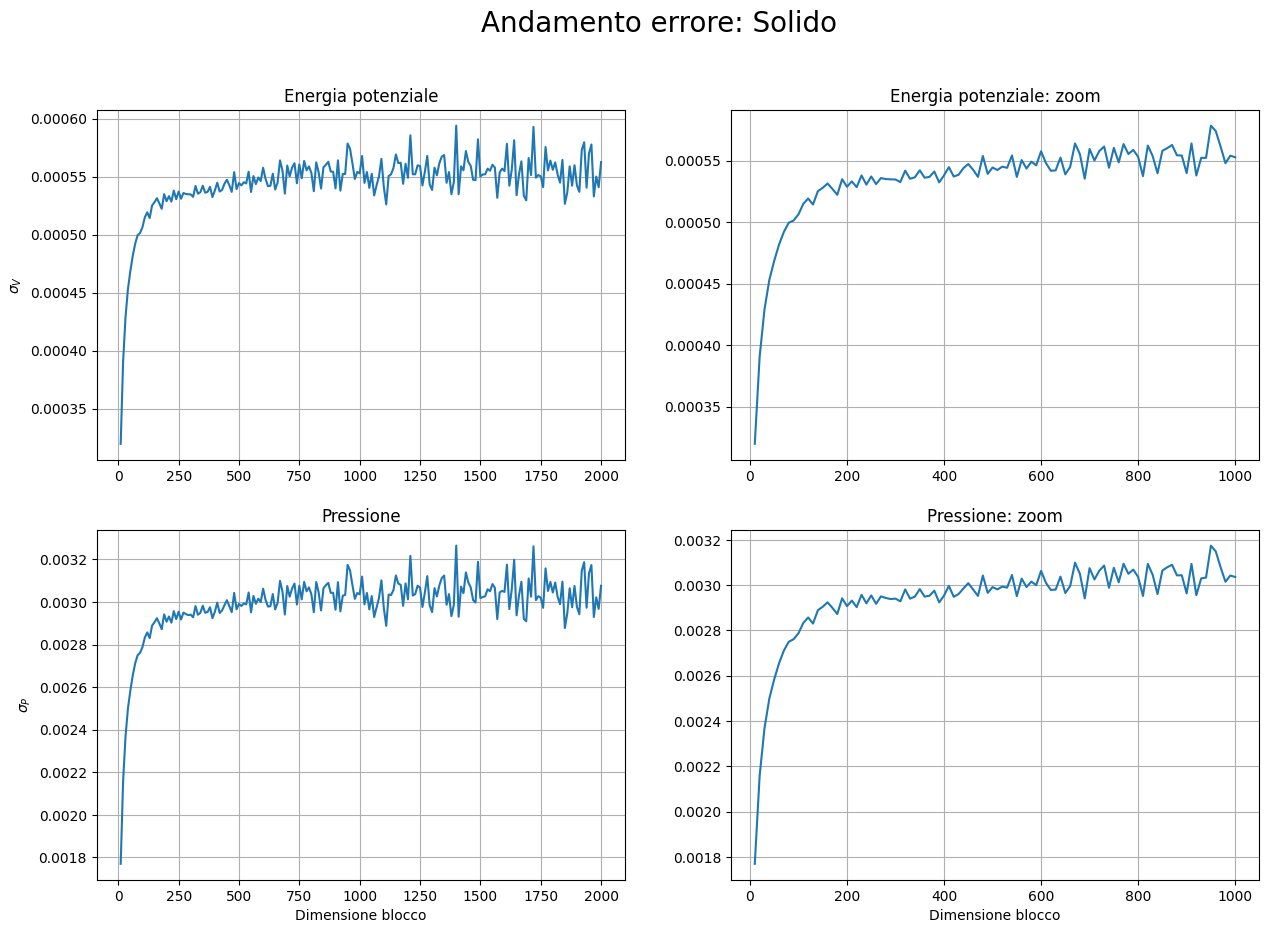

In [130]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
titolo = np.array(['Energia potenziale', 'Pressione'])

for i in range (0, 2):
    for j in range(0, 2):

        if i==0:

            if j==0:
                ax[i][j].plot(np.array([10 * i for i in range(1, 201)]), sol_errpot)
                ax[i][j].set_title(titolo[i])
                ax[i][j].set_ylabel(r'$\sigma_V$')
                
            else:
                ax[i][j].plot(np.array([10 * i for i in range(1, 101)]), sol_errpot[0 :100])
                ax[i][j].set_title(titolo[i] + ': zoom')


        else:

            if j==0:
                ax[i][j].plot(np.array([10 * i for i in range(1, 201)]), sol_errpress)
                ax[i][j].set_title(titolo[i])
                ax[i][j].set_ylabel(r'$\sigma_P$')

            else:
                ax[i][j].plot(np.array([10 * i for i in range(1, 101)]), sol_errpress[0 : 100])
                ax[i][j].set_title(titolo[i] + ': zoom')

            ax[i][j].set_xlabel('Dimensione blocco')

        
        ax[i][j].grid(True)

fig.suptitle(f"Andamento errore: Solido", fontsize = 20)

## <span style="color:blue"> Funzione di distribuzione radiale </span>

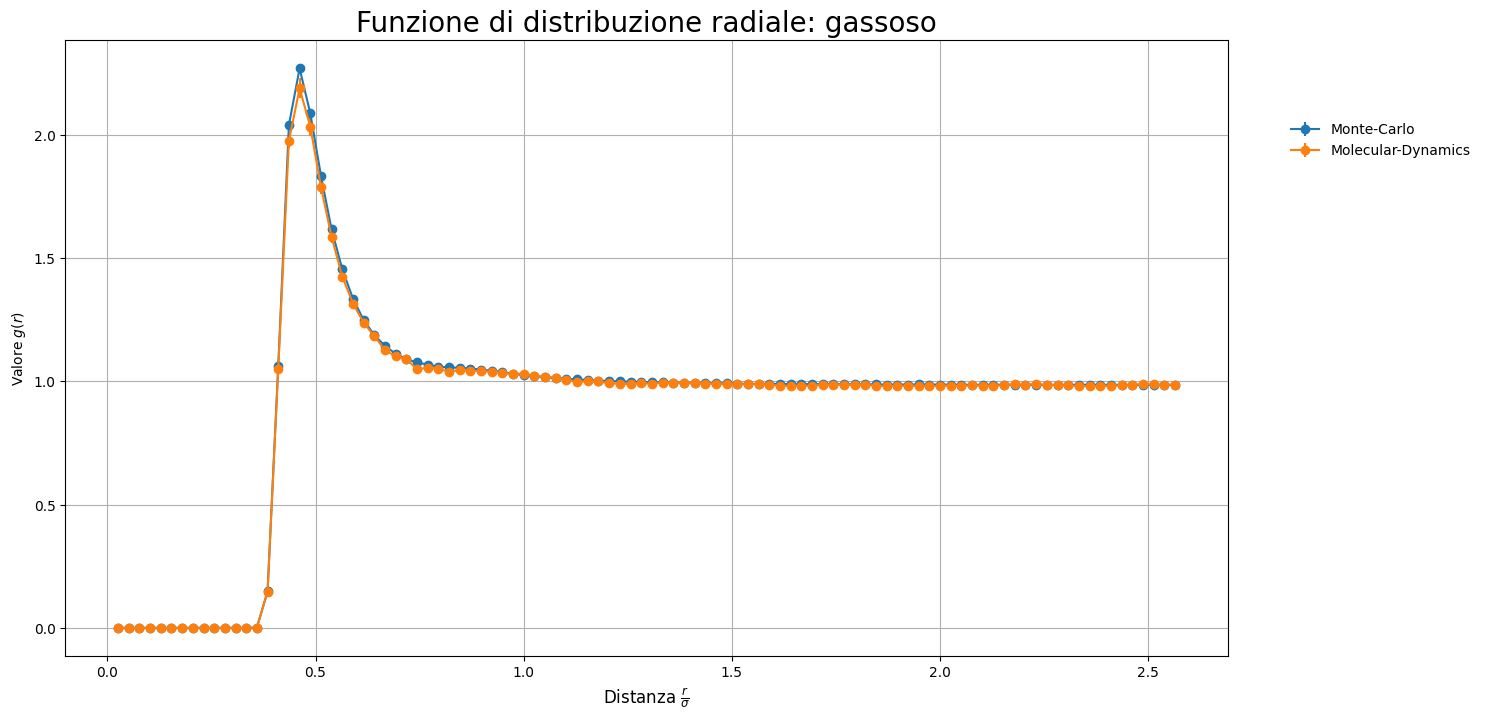

In [131]:
g_r = np.loadtxt("Osservabili/Gassoso/g_r.dat", unpack=True)

figura, plot = plt.subplots(1, 1, figsize=(15, 8))
nomi = ["Monte-Carlo", "Molecular-Dynamics"]

#Dimensione del singolo bin (per asse x)
nbins = 100; rho = 0.8; npart = 108

vol = np.float64(npart)/rho
box = math.pow(vol,1.0/3.0); 
bin_size = box/(2 * nbins)


for i in range(0,2):
    plt.errorbar(g_r[0, 100*i:100*(1+i) ] * bin_size, g_r[1, 100*i:100*(i+1) ], yerr = g_r[2, 100*i:100*(i+1) ], label = nomi[i], fmt = 'o-')

plt.grid(True)
plt.ylabel(r'Valore $g\left(r\right)$')
plt.legend(loc=(1.05, 0.8), frameon=False)
plt.xlabel(r'Distanza $\frac{r}{\sigma}$', fontsize = 12)

plt.title(f"Funzione di distribuzione radiale: gassoso", fontsize = 20)

plt.show()

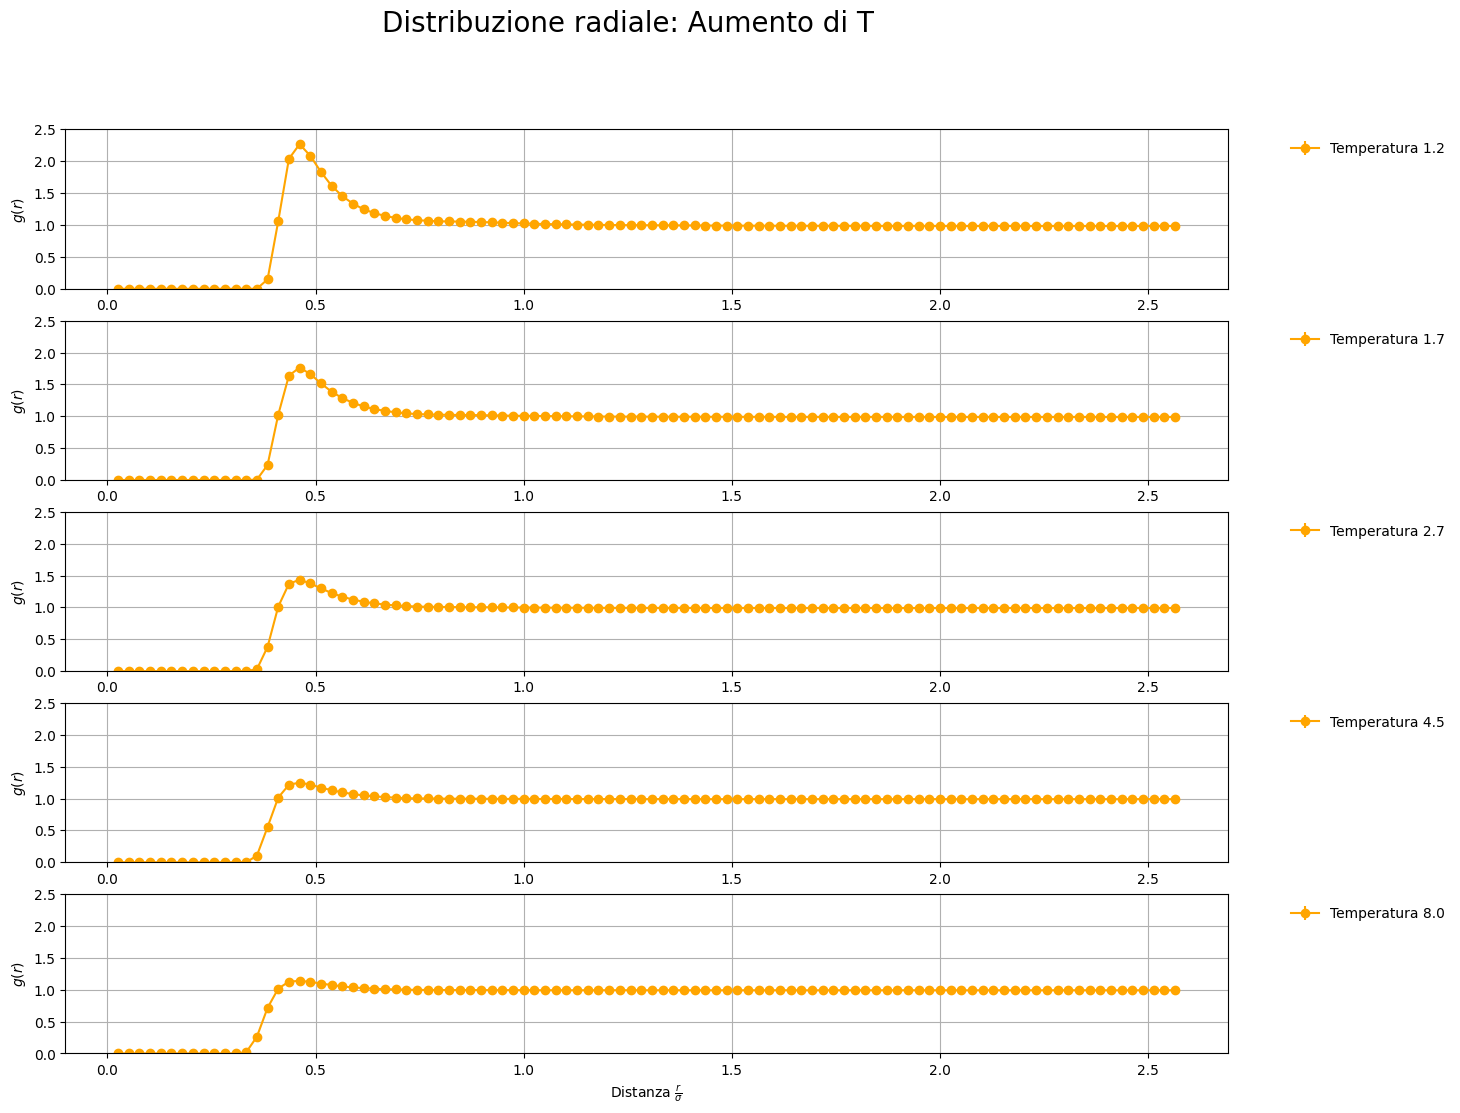

In [132]:
g_r = np.loadtxt("Osservabili/Gassoso/goccioline.dat", unpack=True)

figura, plot = plt.subplots(5, 1, figsize=(15, 12))
titolo = np.array(['Temperatura 1.2', 'Temperatura 1.7', 'Temperatura 2.7', 'Temperatura 4.5', 'Temperatura 8.0'])

for i in range(0, 5):
    plot[i].errorbar(g_r[0, 100*i:100*(1+i)] * bin_size , g_r[1, 100*i:100*(1+i)], yerr = g_r[2, 100*i:100*(1+i)], label = titolo[i], fmt = 'o-', color = 'orange')
    plot[i].grid(True)
    plot[i].set_ylim(0, 2.5)
    plot[i].set_ylabel(r'$g\left(r\right)$')
    plot[i].legend(loc=(1.05, 0.8), frameon=False)


plot[4].set_xlabel(r'Distanza $\frac{r}{\sigma}$')
figura.suptitle('Distribuzione radiale: Aumento di T', fontsize = '20')
plt.show()

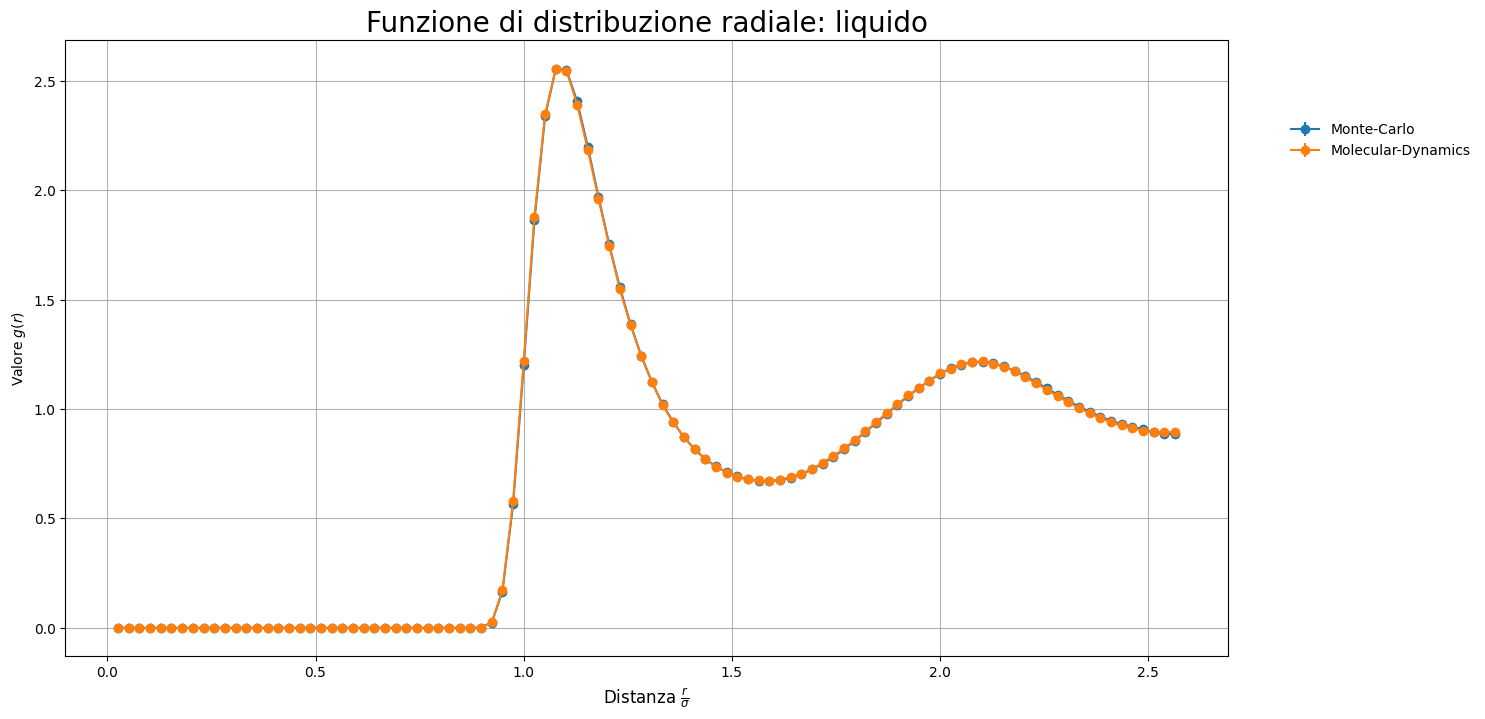

In [133]:
g_r = np.loadtxt("Osservabili/Liquido/g_r.dat", unpack=True)

figura, plot = plt.subplots(1, 1, figsize=(15, 8))
nomi = ["Monte-Carlo", "Molecular-Dynamics"]

#Dimensione del singolo bin (per asse x)
nbins = 100; rho = 0.8; npart = 108

vol = np.float64(npart)/rho
box = math.pow(vol,1.0/3.0); 
bin_size = box/(2 * nbins)


for i in range(0,2):
    plt.errorbar(g_r[0, 100*i:100*(1+i) ] * bin_size, g_r[1, 100*i:100*(i+1) ], yerr = g_r[2, 100*i:100*(i+1) ], label = nomi[i], fmt = 'o-')

plt.legend(loc=(1.05, 0.8), frameon=False)
plt.ylabel(r'Valore $g\left(r\right)$')
plt.grid(True)

plt.xlabel(r'Distanza $\frac{r}{\sigma}$', fontsize = 12)
plt.title(f"Funzione di distribuzione radiale: liquido", fontsize = 20)

plt.grid(True)
plt.show()

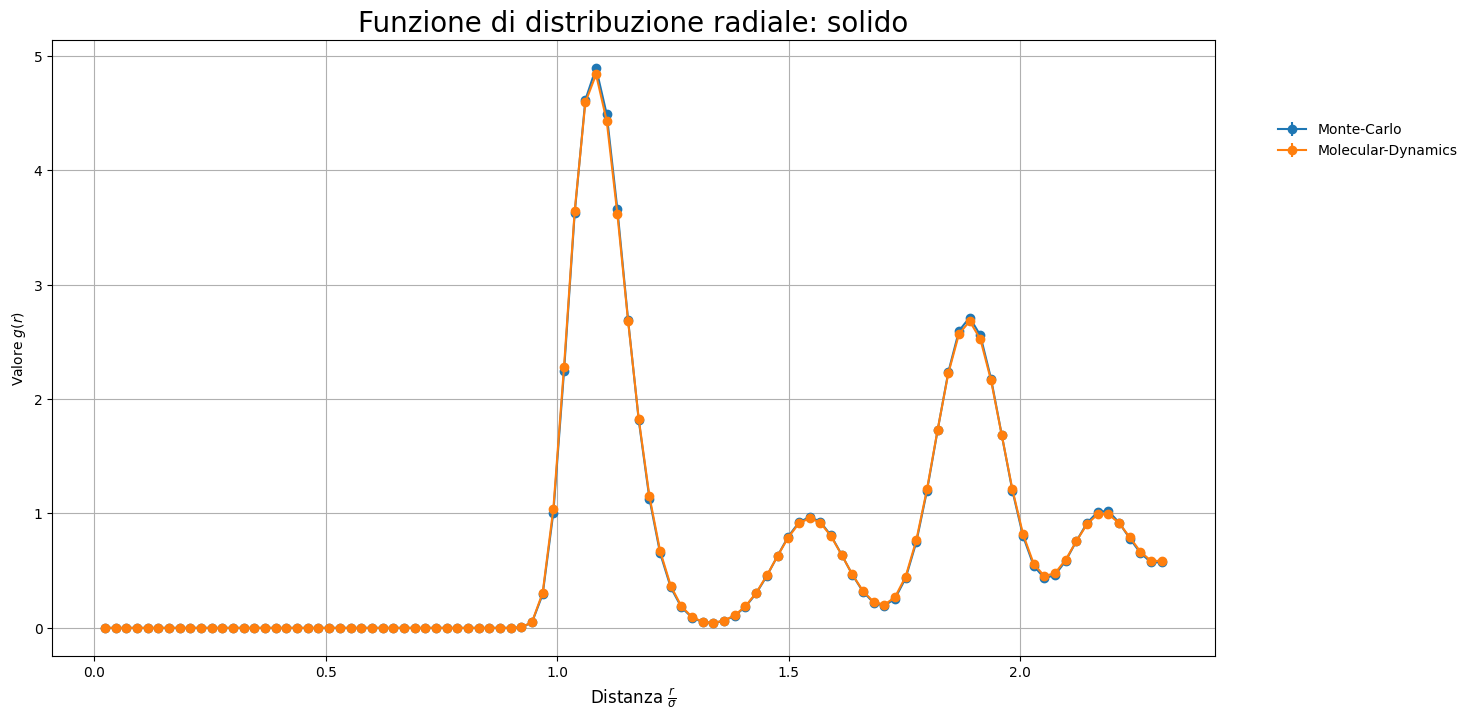

In [134]:
g_r = np.loadtxt("Osservabili/Solido/g_r.dat", unpack=True)

figura, plot = plt.subplots(1, 1, figsize=(15, 8))
nomi = ["Monte-Carlo", "Molecular-Dynamics"]

#Dimensione del singolo bin (per asse x)
nbins = 100; rho = 1.1; npart = 108

vol = np.float64(npart)/rho
box = math.pow(vol,1.0/3.0); 
bin_size = box/(2 * nbins)


for i in range(0,2):
    plt.errorbar(g_r[0, 100*i:100*(1+i) ] * bin_size, g_r[1, 100*i:100*(i+1) ], yerr = g_r[2, 100*i:100*(i+1) ], label = nomi[i], fmt = 'o-')

plt.legend(loc=(1.05, 0.8), frameon=False)
plt.ylabel(r'Valore $g\left(r\right)$')
plt.grid(True)

plt.xlabel(r'Distanza $\frac{r}{\sigma}$', fontsize = 12)
plt.title(f"Funzione di distribuzione radiale: solido", fontsize = 20)

plt.grid(True)
plt.show()

## <span style="color:blue"> Pressione </span>

Pressione fase gassosa: 0.049
Errore associato: 2e-05

Pressione fase liquida: 1.40006
Errore associato: 0.00412

Pressione fase solida: 7.59356
Errore associato: 0.00329



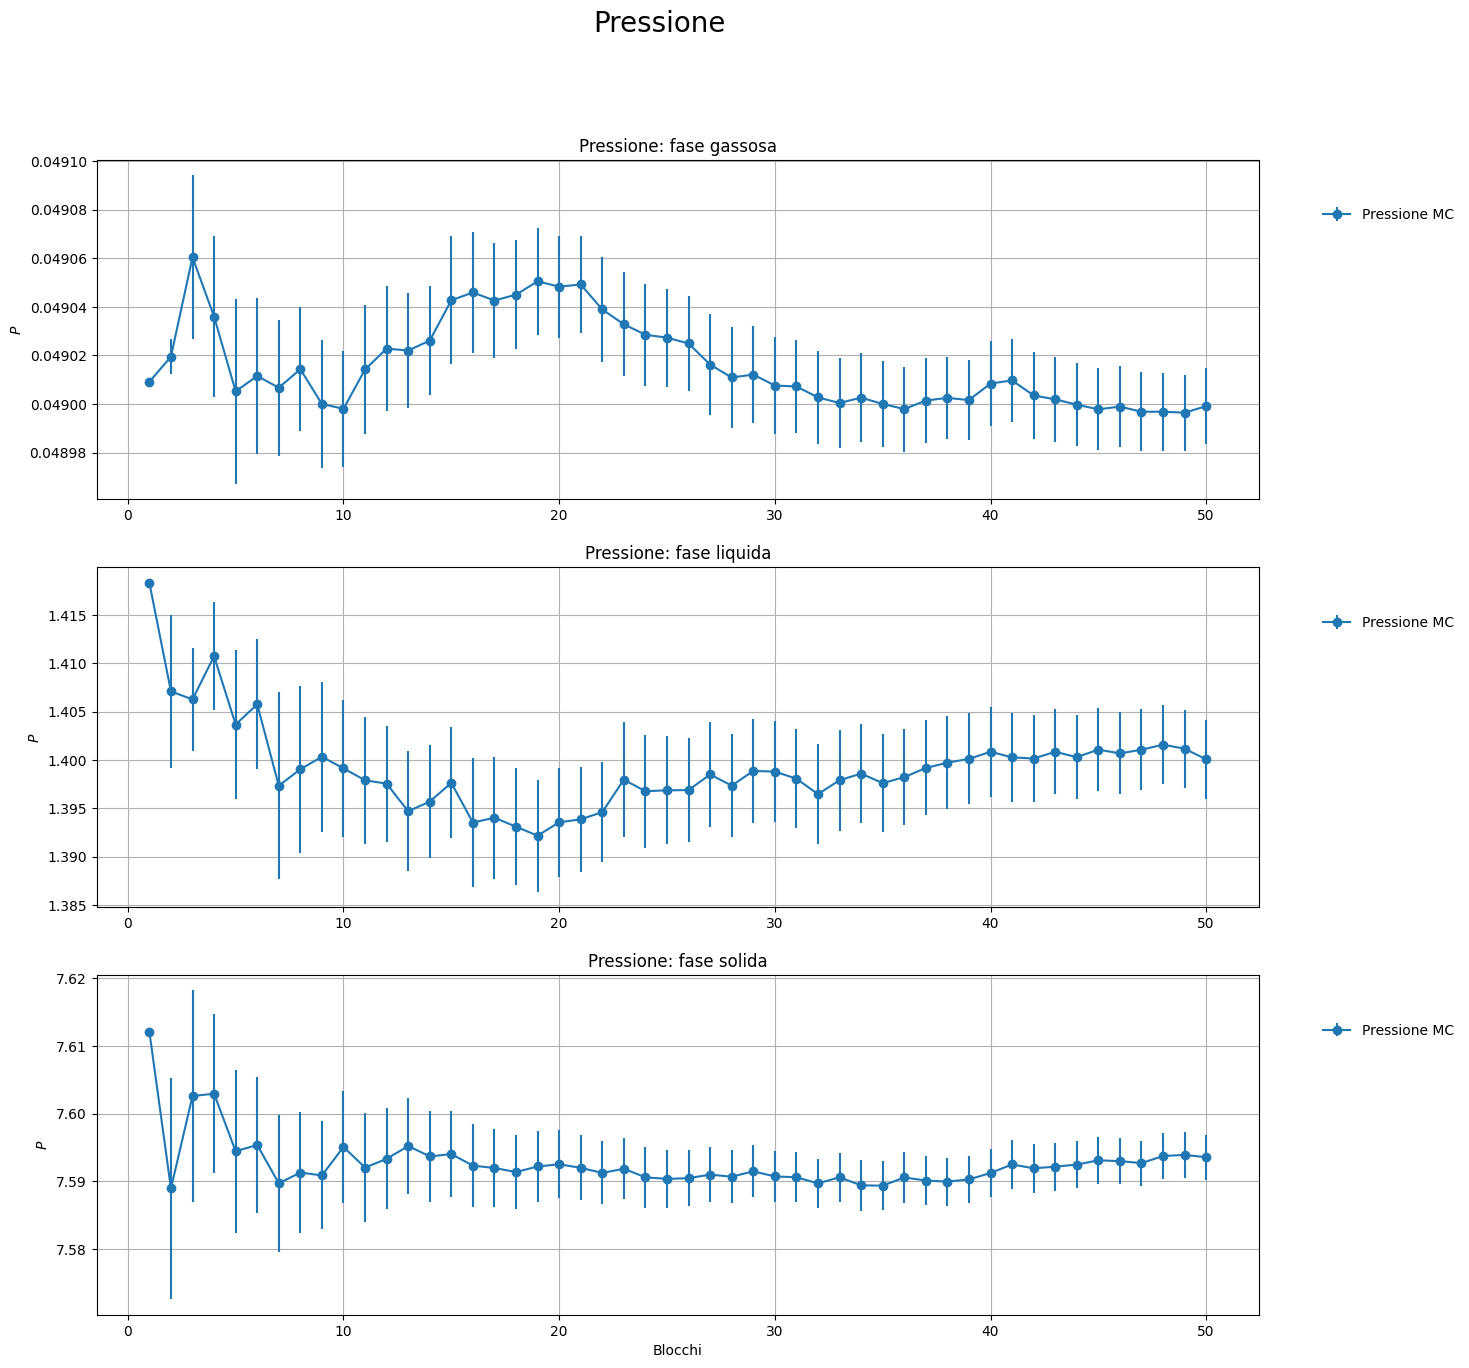

In [135]:
pressione = np.loadtxt("Osservabili/Pressione.dat", unpack = True)
titolo = np.array(['fase gassosa', 'fase liquida', 'fase solida'])

fig, ax = plt.subplots(3, 1, figsize = (15,15))

for i in range(0, 3):
    ax[i].errorbar(pressione[0, 0 : 50], pressione[2, 50*i:50*(i+1)], yerr = pressione[3, 50*i:50*(i+1)], label = 'Pressione MC', fmt = 'o-')
    
    ax[i].legend(loc=(1.05, 0.8), frameon=False)
    ax[i].set_title('Pressione: ' + titolo[i])
    ax[i].set_ylabel(r'$P$')
    ax[i].grid(True)

    print("Pressione " + titolo[i] + ": " + str(round(pressione[2, 50*(i+1)-1], 5)))
    print("Errore associato: " + str(round(pressione[3, 50*(i+1)-1], 5)) + '\n')

ax[2].set_xlabel('Blocchi')
fig.suptitle('Pressione', size = 20)
plt.show()

## <span style="color:blue"> Energia potenziale </span>

Potenziale fase gassosa: -0.41431
Errore associato: 0.00016

Potenziale fase liquida: -5.46361
Errore associato: 0.00074

Potenziale fase solida: -7.54659
Errore associato: 0.00061



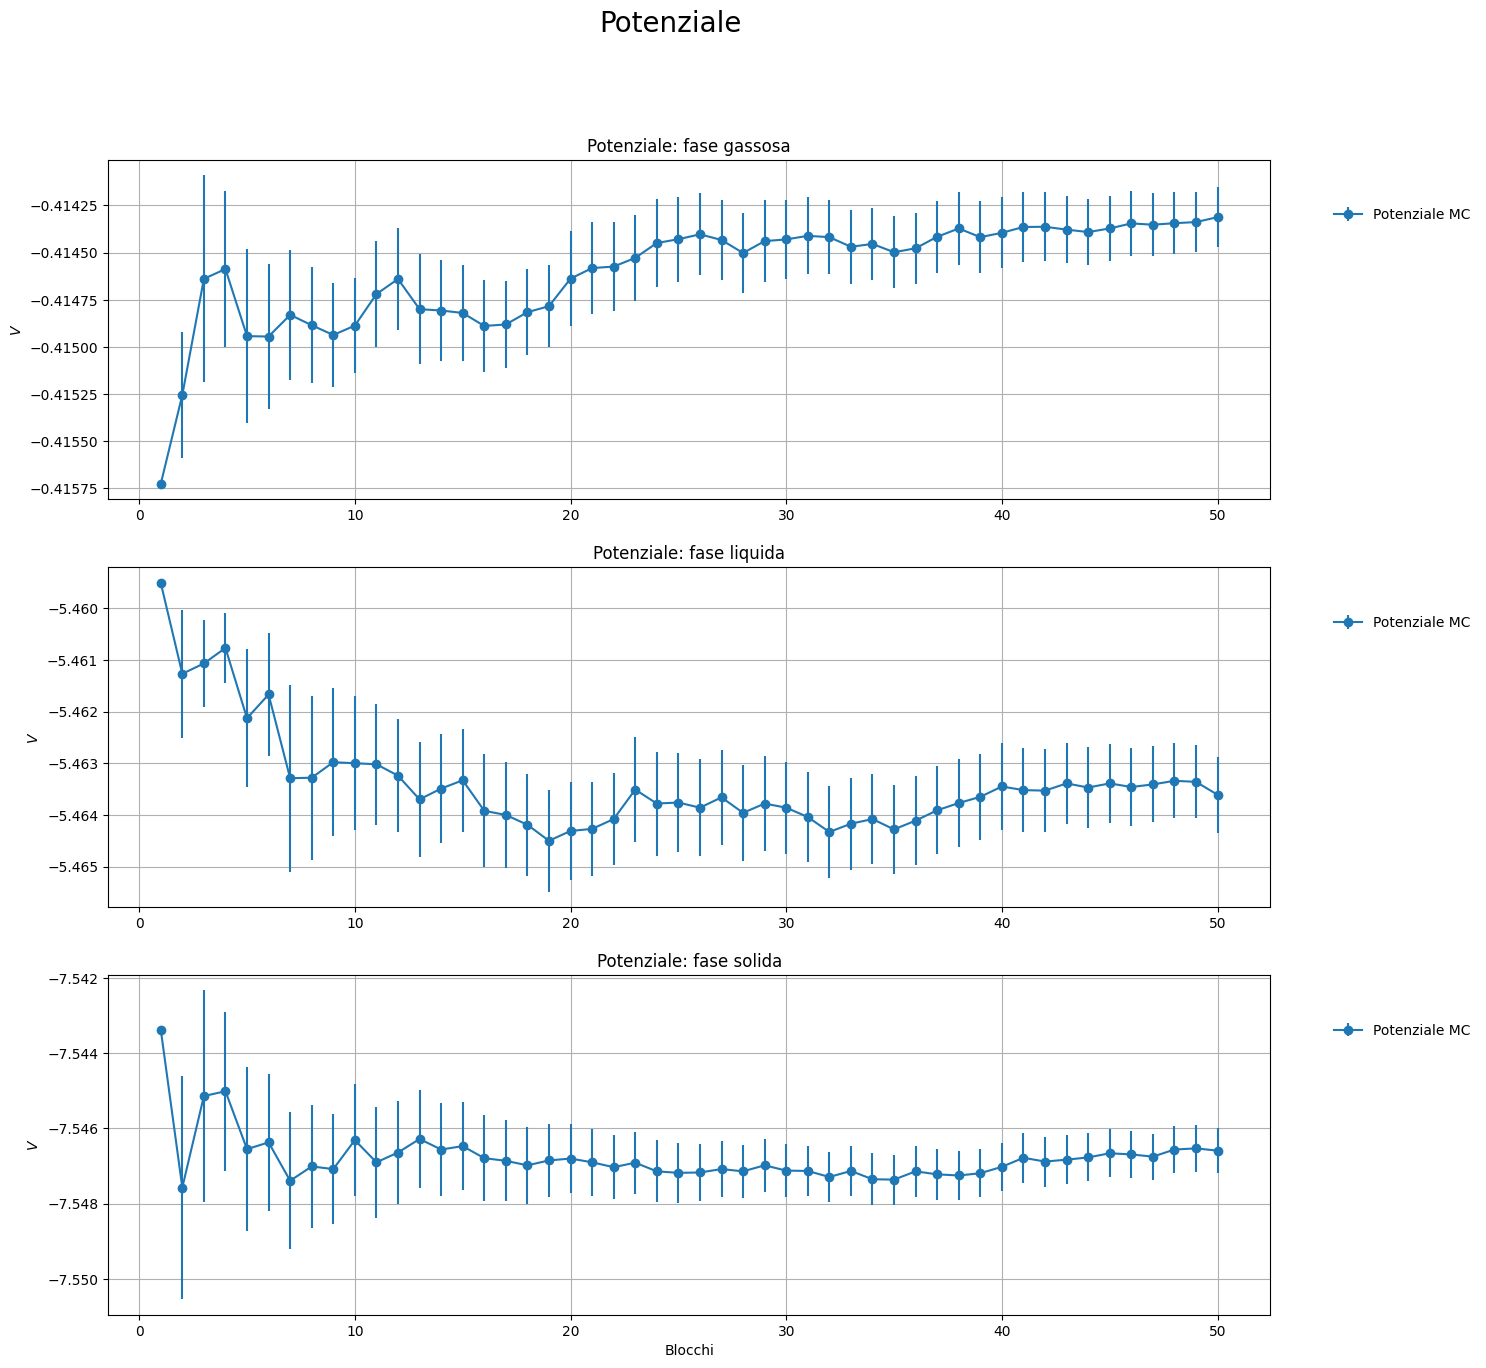

In [136]:
potenziale = np.loadtxt("Osservabili/Potenziale.dat", unpack = True)
titolo = np.array(['fase gassosa', 'fase liquida', 'fase solida'])

fig, ax = plt.subplots(3, 1, figsize = (15,15))

for i in range(0, 3):
    ax[i].errorbar(potenziale[0, 0 : 50], potenziale[2, 50*i:50*(i+1)], yerr = potenziale[3, 50*i:50*(i+1)], label = 'Potenziale MC', fmt = 'o-')
    
    ax[i].legend(loc=(1.05, 0.8), frameon=False)
    ax[i].set_title('Potenziale: ' + titolo[i])
    ax[i].set_ylabel(r'$V$')
    ax[i].grid(True)

    print("Potenziale " + titolo[i] + ": " + str(round(potenziale[2, 50*(i+1)-1], 5)))
    print("Errore associato: " + str(round(potenziale[3, 50*(i+1)-1], 5)) + '\n')

ax[2].set_xlabel('Blocchi')
fig.suptitle('Potenziale', size = 20)
plt.show()